# Benford's Law  
  
班佛定律（英語：Benford's law)，說明一堆從實際生活得出的數據中，以1為首位數字的數的出現機率約為總數的三成，接近直覺得出之期望值1/9的3倍。推廣來說，越大的數，以它為首幾位的數出現的機率就越低。它可用於檢查各種數據是否有造假。 
  
[wikipedia](https://en.wikipedia.org/wiki/Benford's_law)  
Benford's law, also called the Newcomb–Benford law, the law of anomalous numbers, or the first-digit law, is an observation about the frequency distribution of leading digits in many real-life sets of numerical data. The law states that in many naturally occurring collections of numbers, the leading significant digit is likely to be small. For example, in sets that obey the law, the number 1 appears as the leading significant digit about 30% of the time, while 9 appears as the leading significant digit less than 5% of the time. If the digits were distributed uniformly, they would each occur about 11.1% of the time.Benford's law also makes predictions about the distribution of second digits, third digits, digit combinations, and so on.  


In [1]:
import matplotlib.pyplot as plt
import pandas as pd 
import re
from collections import Counter

<function matplotlib.pyplot.show(*args, **kw)>

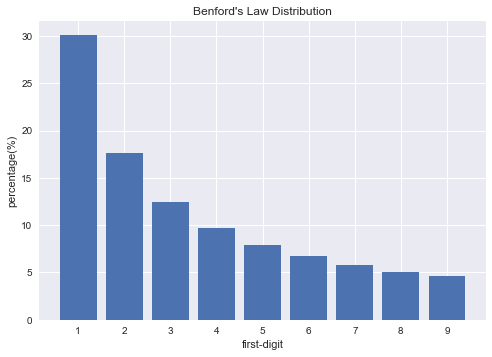

In [2]:
benfordList = [30.1, 17.6, 12.5, 9.7, 7.9, 6.7, 5.8, 5.1, 4.6]
plt.style.use('seaborn')
plt.bar(range(1,10),benfordList)
plt.xticks(range(1,10))
plt.xlabel('first-digit')
plt.ylabel('percentage(%)')
plt.title('Benford\'s Law Distribution')
plt.show

## Define a function for Benford's Law

In [3]:
def benfordLaw(list_data, title): # 輸入參數為 資料list, 標題名稱
    
    total = len(list_data) # 資料中總共有多少組數
    benfordList = [30.1, 17.6, 12.5, 9.7, 7.9, 6.7, 5.8, 5.1, 4.6] #這是 Benford's Law 的分佈
    
    # 處理首位數字
    first_nums = [ int(str(num)[0]) for num in list_data ]
#     first_nums = [] # 用來裝取出的首位數字
#     for num in list_data:
#         first_digit = str(num)[0] # 將每個資料轉為string，利用切片取出的首位字
#         first_nums.append(int(first_digit)) # 將取出的首位字轉回int，加到list中
    first_nums.sort() # 讓數列排序
    count = Counter(first_nums) # 計算出每個數字共有幾個
    for key in count:
        count[key] = round((count[key]/total*100),2) # 將計數轉換為佔總數的百分比
    
    # 畫出數值比較表格
    table = pd.DataFrame(count, index=[title])
    table.loc['Benford List'] = benfordList
    print(table)
    
    #畫出資料 長條圖 與 Benford's Law 的分佈曲線比較
    x = list(count.keys()) # x軸使用count的index
    plt.style.use('ggplot')
    plt.plot(x, benfordList, label='Benford\'s Distribution', color='blue') #這是Benford Law分佈曲線
    plt.bar(count.keys(), count.values()) #這是資料的長條圖
    plt.title(title)
    plt.ylabel('Percentage(%)')
    plt.xlabel('Number')
    plt.xticks(x)
    plt.legend()
    plt.show()

                  1      2      3      4      5      6      7      8      9
Test Data     11.11  11.11  11.11  11.11  11.11  11.11  11.11  11.11  11.11
Benford List  30.10  17.60  12.50   9.70   7.90   6.70   5.80   5.10   4.60


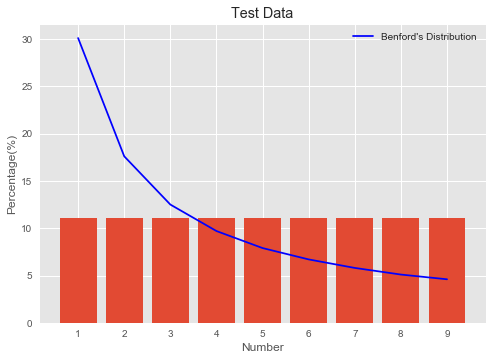

In [4]:
data = [21234, 11234, 3123456, 41234, 512, 612345678, 7443, 832, 9783467834]
benfordLaw(data, 'Test Data')

## 測試數據一：各國家面積

In [5]:
dfs_area = pd.read_html('https://en.wikipedia.org/wiki/List_of_countries_and_dependencies_by_area')
df_area = dfs_area[0][:259] # 只留前面259筆數據
df_area.head()

,Rank,Sovereign state/dependency,Total in km2 (mi2),Land in km2 (mi2),Water in km2 (mi2),% water,Notes
0,NaN,World,"510,072,000 (196,940,000)","148,940,000 (57,510,000)","361,132,000 (139,434,000)",70.8,NaN
1,1.0,Russia,"17,098,246 (6,601,670)","16,377,742 (6,323,482)","720,500 (278,200)",4.21,Largest country in the world (10.995% of the w...
2,NaN,Antarctica,"14,000,000 (5,400,000)","14,000,000 (5,400,000)",0 (0),0,"13,720,000 km2 (5,300,000 sq mi) (98%) of the ..."
3,2.0,Canada,"9,984,670 (3,855,100)","9,093,507 (3,511,023)","891,163 (344,080)",8.93,Largest English and French-speaking country an...
4,3.0,China,"9,596,961 (3,705,407)","9,326,410 (3,600,950)","270,550 (104,460)",2.82,Second-largest country in Asia (though the lar...


                    1      2      3      4     5     6     7     8     9
Countries Area  28.19  18.92  12.74  10.42  7.34  7.34  5.79  3.86  5.41
Benford List    30.10  17.60  12.50   9.70  7.90  6.70  5.80  5.10  4.60


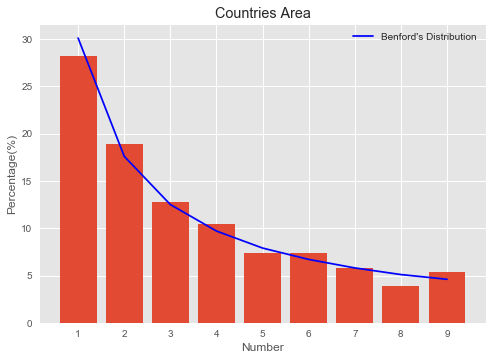

In [6]:
def trim_area(area): #製作一個函式用來處理欄位資料
    process = re.split('\(.*\)', area)[0].replace(',','').split()[0]
    return float(process)
    # re.split('\(.*\)', area) >> 利用re去除包在()中不要的部份
    # .replace(',','').split() >> 移除千分位，並將多餘的空格刪掉

areas = df_area['Total in km2 (mi2)'].apply(trim_area).tolist() # 將上面的trim_area()作用在'Total in km2 (mi2)'欄位資料，並將結果變成list

benfordLaw(areas, 'Countries Area') #代入benfordLaw()

## 測試數據二：世界各國GDP

In [7]:
dfs_GDP = pd.read_html('https://en.wikipedia.org/wiki/List_of_countries_by_GDP_(nominal)')
df_GDP = dfs_GDP[4] # data of 'Per the World Bank (2018)'
df_GDP.head()

,Rank,Country/Territory,GDP(US$million)
0,NaN,World,85804391
1,1,United States,20494100
2,2,China[n 5],13608152
3,3,Japan,4970916
4,4,Germany,3996759


                   1      2      3      4      5     6     7     8     9
Countries GDP  32.98  17.28  13.09  10.99  10.99  3.14  4.71  4.71  2.09
Benford List   30.10  17.60  12.50   9.70   7.90  6.70  5.80  5.10  4.60


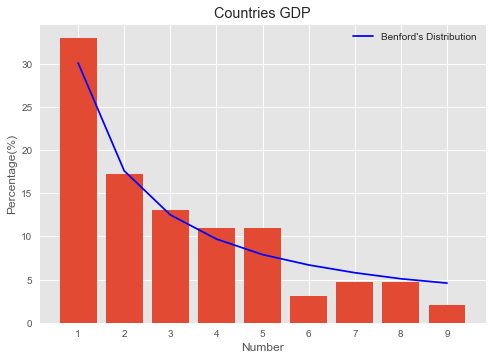

In [8]:
def del_2017(data): # 用來處理格式不一樣的數據
    if data[-6:] == '(2017)':
        trimed = data[:-6] # 去除掉後面6位的'(2017)'
        new_data = trimed.replace(',','').strip() # 剩下部分處理千分號與空格
    else:
        new_data = data # 沒有'(2017)'的就不變
    return new_data

df_GDP['GDP(US$million)'] = df_GDP['GDP(US$million)'].apply(del_2017) # 將做好的函式作用在要的欄位資料上
GDPs = df_GDP['GDP(US$million)'].apply(int).tolist()  # 把資料轉為int再變成list

benfordLaw(GDPs, 'Countries GDP') #代入benfordLaw()

## 測試數據三：Fibonacci數列

                  1      2      3     4     5     6     7     8     9
Fibonacci     30.14  17.66  12.48  9.58  7.98  6.69  5.69  5.29  4.49
Benford List  30.10  17.60  12.50  9.70  7.90  6.70  5.80  5.10  4.60


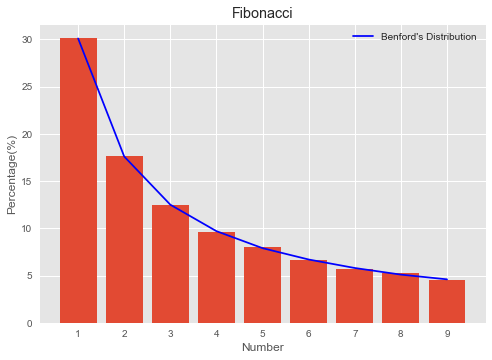

In [9]:
def fibonacci(nums):
    fibo_list = [1, 1] # 因為在班佛定律中沒有0，所以我把製作的數列從1開始
    for i in range(nums):
        n =fibo_list[i]+fibo_list[i+1] #依照費氏數列的規則生成
        fibo_list.append(n)
    return fibo_list

fibo_data = fibonacci(1000) # 看生成1000個數列
benfordLaw(fibo_data, 'Fibonacci') #代入benfordLaw()

## 測試數據四：上市公司每月營業收入表  
  
https://data.gov.tw/dataset/18420

In [10]:
df_revenue = pd.read_csv('https://quality.data.gov.tw/dq_download_csv.php?nid=18420&md5_url=cfee038a8a9009bf31df7b23328dcc3f')
df_revenue.head()

,出表日期,資料年月,公司代號,公司名稱,產業別,營業收入-當月營收,營業收入-上月營收,營業收入-去年當月營收,營業收入-上月比較增減(%),營業收入-去年同月增減(%),累計營業收入-當月累計營收,累計營業收入-去年累計營收,累計營業收入-前期比較增減(%),備註
0,109/02/16,109/1,1101,台泥,水泥工業,7502141,12349908,9394240,-39.253467,-20.141055,7502141,9394240,-20.141055,-
1,109/02/16,109/1,1102,亞泥,水泥工業,5210319,8115203,7905737,-35.795580,-34.094456,5210319,7905737,-34.094456,-
2,109/02/16,109/1,1103,嘉泥,水泥工業,165029,157879,177060,4.528785,-6.794872,165029,177060,-6.794872,-
3,109/02/16,109/1,1104,環泥,水泥工業,359966,457657,479518,-21.345899,-24.931702,359966,479518,-24.931702,-
4,109/02/16,109/1,1108,幸福,水泥工業,296395,377849,353189,-21.557289,-16.080342,296395,353189,-16.080342,-


                    1      2      3     4     5    6     7     8     9
Company Revenue  30.6  17.06  14.07  9.17  7.57  6.5  5.97  4.37  4.69
Benford List     30.1  17.60  12.50  9.70  7.90  6.7  5.80  5.10  4.60


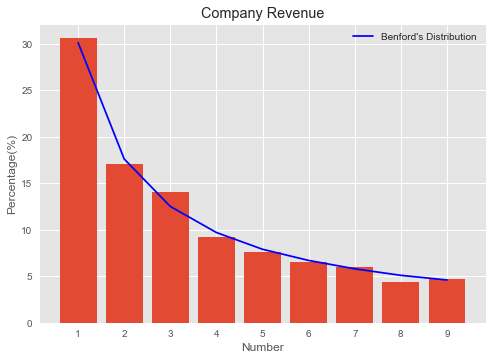

In [11]:
revenue = df_revenue['營業收入-當月營收'][df_revenue['營業收入-當月營收']>0].tolist()
benfordLaw(revenue, 'Company Revenue')

## 測試數據四：不動產實價登錄資訊-買賣案件  
  
https://data.gov.tw/dataset/26820  
  
資料資源欄位: district(鄉鎮市區)、rps01(交易標的)、rps02(土地區段位置或建物區門牌)、rps03(土地移轉總面積平方公尺)、rps04(都市土地使用分區)、rps05(非都市土地使用分區)、rps06(非都市土地使用編定)、rps07(交易年月)、rps08(交易筆棟數)、rps09(移轉層次)、rps10(總樓層數)、rps11(建物型態)、rps12(主要用途)、rps13(主要建材)、rps14(建築完成年月)、rps15(建物移轉總面積平方公尺)、rps16(建物現況格局-房)、rps17(建物現況格局-廳)、rps18(建物現況格局-衛)、rps19(建物現況格局-隔間)、rps20(有無管理組織)、rps21(總價元)、rps22(單價每平方公尺)、rps23(車位類別)、rps24(車位移轉總面積平方公尺)、rps25(車位總價元)、rps26(備註)、rps27(編號)  

In [12]:
df_house = pd.read_csv('https://quality.data.gov.tw/dq_download_csv.php?nid=26820&md5_url=1bf11f76a5c0de2d54c8d42afd8e8599')
df_house.head()

,district,rps01,rps02,rps03,rps04,rps05,rps06,rps07,rps08,rps09,...,rps18,rps19,rps20,rps21,rps22,rps23,rps24,rps25,rps26,rps27
0,板橋區,房地(土地+建物),新北市板橋區新生街23巷1~30號,30.44,住,NaN,NaN,1080630,土地1建物1車位0,四層,...,2,有,無,9090000,80578.0,NaN,0.00,0,含增建或未登記建物。;,RPRPMLMLPHOFFAF58CA
1,板橋區,房地(土地+建物)+車位,新北市板橋區文化路一段188巷31~60號,22.60,住,NaN,NaN,1080417,土地1建物1車位1,三層,...,2,有,有,40470000,190149.0,坡道平面,44.59,2600000,NaN,RPPNMLNLPHOFFAF28CA
2,板橋區,土地,文化段2191~2220地號,0.30,住,NaN,NaN,1080417,土地1建物0車位0,NaN,...,0,有,有,120000,0.0,NaN,0.00,0,畸零地或有合併使用之交易。,RPQNMLNLPHOFFAF38CA
3,土城區,房地(土地+建物),新北市土城區學府路一段98巷1~30號,4.19,住,NaN,NaN,1080627,土地1建物1車位0,九層,...,1,有,有,3600000,123161.0,NaN,0.00,0,含增建或未登記建物。,RPSNMLNLPHOFFAF58CA
4,板橋區,房地(土地+建物)+車位,新北市板橋區縣民大道一段271~300號,41.33,住,NaN,NaN,1080114,土地3建物1車位2,九層,...,0,無,有,89680000,179352.0,坡道平面,49.62,5200000,建商與地主合建案。;,RPTNMLNLPHOFFAF68CA


                  1      2      3     4     5     6     7     8     9
House Sale    39.27  12.24   5.69  4.68  5.12  7.15  9.79  8.44  7.62
Benford List  30.10  17.60  12.50  9.70  7.90  6.70  5.80  5.10  4.60


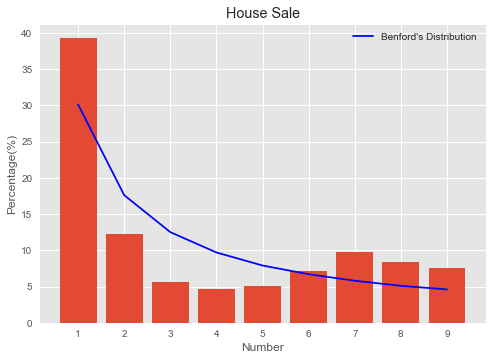

In [13]:
house_sale = df_house.rps21.tolist()
benfordLaw(house_sale, 'House Sale')